In [1]:
import warnings
warnings.filterwarnings("ignore")
from api import API

Using TensorFlow backend.


In [2]:
redd = {
  'power': {
    'mains': ['apparent','active'],
    'appliance': ['apparent','active']
  },
  'sample_rate': 60,
  'artificial_aggregate':True,
  'appliances': ['fridge','air conditioner','electric furnace','washing machine'],
  'methods': {

      'Mean': {},"DSC":{'learning_rate':5*1e-10,'iterations':100},"AFHMM":{},"AFHMM_SAC":{}
  },
   'train': {    
    'datasets': {
            'Dataport': {
                'path': '../dataport.hdf5',
				'buildings': {

				10: {
					'start_time': '2015-04-04',
					'end_time': '2015-04-24'
				},
				15: {
					'start_time': '2015-04-30',
					'end_time': '2015-05-20'
				}
				}
				                
			}
			}
	},
	'test': {
	'datasets': {
		'Datport': {
			'path': '../dataport.hdf5',
			'buildings': {
                
				10: {
					'start_time': '2015-04-25',
					'end_time': '2015-05-01'
					},
				15: {
					'start_time': '2015-05-20',
					'end_time': '2015-05-27'
					}
			}
	}
},
        'metrics':['mae']
}
}

Joint Testing for all algorithms
Loading data for  Datport  dataset
Dropping missing values
Creating an Artificial Aggregate
Started Prediction using:  Mean
Started Prediction using:  DSC
Started Prediction using:  AFHMM
Started Prediction using:  AFHMM_SAC
Num threads  13
finish time is  662.0498042106628
............  mae  ..............
                        Mean        DSC      AFHMM   AFHMM_SAC
fridge             48.931244  63.032562  33.634274   29.108257
air conditioner   217.217117  72.593117  52.573719  154.282135
electric furnace   70.432358  34.851650  20.799337   51.709881
washing machine     7.248257  12.515224   3.729729    3.947682
Dropping missing values
Creating an Artificial Aggregate
Started Prediction using:  Mean
Started Prediction using:  DSC
Started Prediction using:  AFHMM
Started Prediction using:  AFHMM_SAC
Num threads  14
finish time is  641.5944480895996
............  mae  ..............
                        Mean        DSC       AFHMM  AFHMM_SAC
fridge

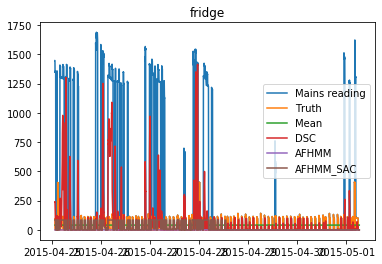

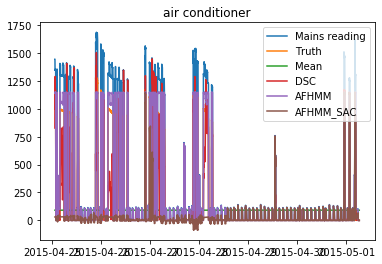

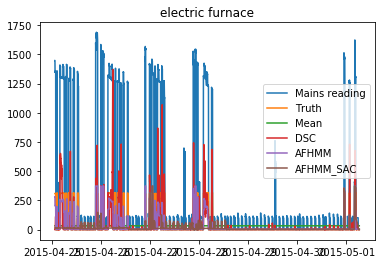

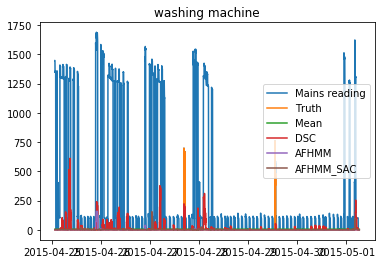

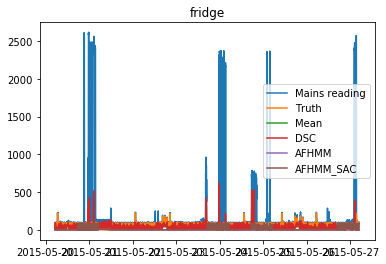

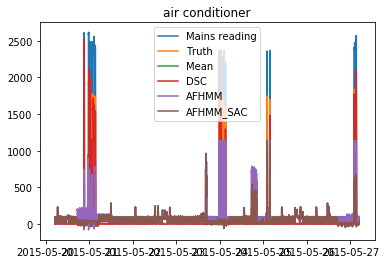

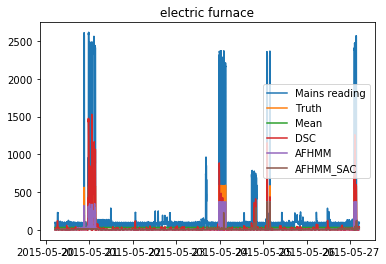

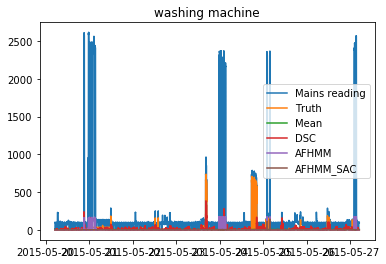

In [3]:

api_res = API(redd)


In [4]:
api_res.errors

[                        Mean        DSC      AFHMM   AFHMM_SAC
 fridge             48.931244  63.032562  33.634274   29.108257
 air conditioner   217.217117  72.593117  52.573719  154.282135
 electric furnace   70.432358  34.851650  20.799337   51.709881
 washing machine     7.248257  12.515224   3.729729    3.947682,
                         Mean        DSC       AFHMM  AFHMM_SAC
 fridge             39.046425  28.816040   49.524635  43.981777
 air conditioner   135.736282  29.481218  102.162918  96.973877
 electric furnace   42.080956  20.380936   12.890176  21.858116
 washing machine    15.130778  16.916210   15.755315  12.381340]

In [5]:
api_res.errors_keys

['Datport_10_mae', 'Datport_15_mae']

In [6]:
import numpy as np
import pandas as pd

vals = np.concatenate([np.expand_dims(df.values,axis=2) for df in api_res.errors],axis=2)


cols = api_res.errors[0].columns
indexes = api_res.errors[0].index


mean = np.mean(vals,axis=2)
std = np.std(vals,axis=2)
print ('\n\n')
print ("Mean")
print (pd.DataFrame(mean,index=indexes,columns=cols))
print ('\n\n')
print ("Standard Deviation")
print (pd.DataFrame(std,index=indexes,columns=cols))




Mean
                        Mean        DSC      AFHMM   AFHMM_SAC
fridge             43.988834  45.924301  41.579454   36.545017
air conditioner   176.476700  51.037168  77.368319  125.628006
electric furnace   56.256657  27.616293  16.844757   36.783998
washing machine    11.189517  14.715717   9.742522    8.164511



Standard Deviation
                       Mean        DSC      AFHMM  AFHMM_SAC
fridge             4.942410  17.108261   7.945181   7.436760
air conditioner   40.740417  21.555949  24.794600  28.654129
electric furnace  14.175701   7.235357   3.954581  14.925882
washing machine    3.941261   2.200493   6.012793   4.216829
